Seed: 0
Silhouette Score is: 0.11362027575179431
Purity Score is: 0.7671957671957672
Seed: 1
Silhouette Score is: 0.11403554201377074
Purity Score is: 0.7632275132275133
Seed: 2
Silhouette Score is: 0.11362027575179431
Purity Score is: 0.7671957671957672
[[0.10022265 0.12293023]
 [0.08643789 0.11194203]
 [0.05366085 0.08097513]
 ...
 [0.31525331 0.25885117]
 [0.36323917 0.30313294]
 [0.25863882 0.23310929]]


/home/goncalo/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/goncalo/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


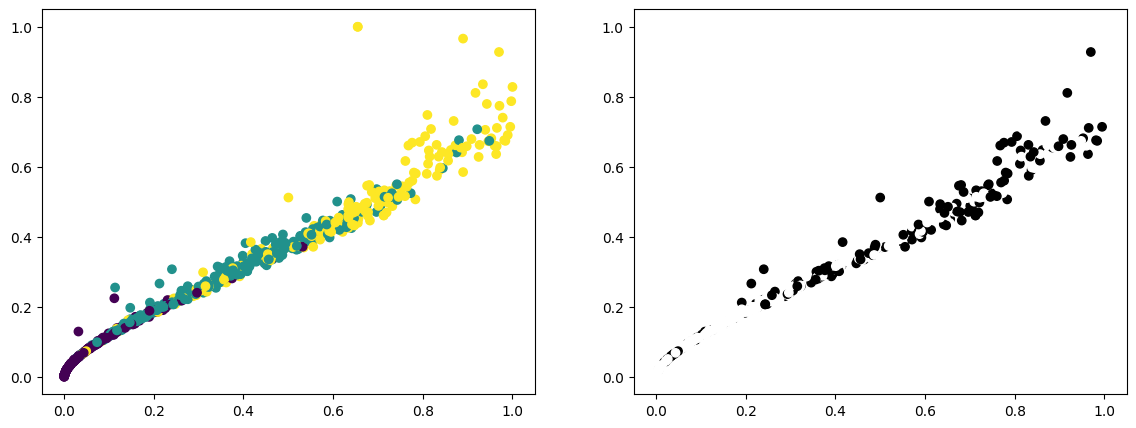

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.feature_selection import SelectKBest, f_classif

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
y = df['class']

X = MinMaxScaler().fit_transform(X, y)
for seed in (0, 1, 2):
    print("Seed:", seed)
    k_means = KMeans(n_clusters=3, random_state=seed).fit(X)
    y_pred = k_means.labels_

    sil = silhouette_score(X, y_pred)
    print('Silhouette Score is:', sil)
    
    pur = purity_score(y, y_pred)
    print('Purity Score is:', pur)

X_kbest = SelectKBest(f_classif, k=2).fit_transform(X, y)

pca = PCA()